# Graphs and Analysis

In [36]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def plot_training_loss(log_history):
#     train_state_df = pd.DataFrame(trainer.state.log_history, columns=["epoch", "step", "loss", "eval_loss"])
    training_loss = [log["loss"] for log in log_history if "loss" in log and "step" in log]
    validation_loss = [log["eval_loss"] for log in log_history if "eval_loss" in log]
    end_step = min(len(training_loss), len(validation_loss))
    training_loss = training_loss[:end_step]
    validation_loss = validation_loss[:end_step]
    
    steps = [log["step"] for log in log_history if "loss" in log][:end_step]
    
    # print(len(training_loss), len(validation_loss), len(steps))
    
    # plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(steps, training_loss, label="Training Loss", color='blue')
    plt.plot(steps, validation_loss, label="Validation Loss", color='orange')
    
    plt.xlabel("Steps")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss Over Time")
    plt.grid(True)
    plt.legend()
    plt.show()



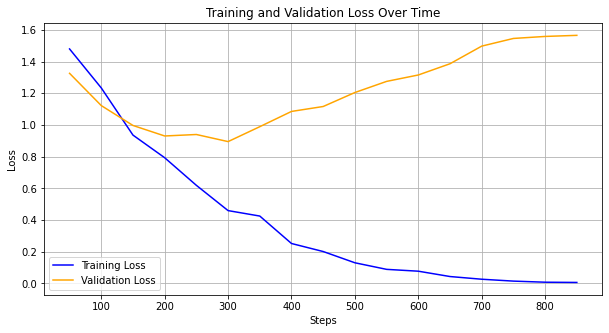

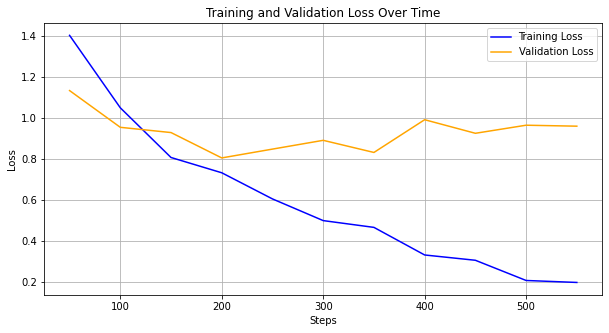

In [22]:
T_STATE_FILES = ["wiki-256/checkpoint-860/trainer_state.json", "all-256-5/trainer_state.json"]
for trainer_state_file in T_STATE_FILES:   
    # Load the training state from the JSON file
    with open(trainer_state_file, 'r') as f:
        trainer_state = json.load(f)
        plot_training_loss(trainer_state["log_history"])

In [73]:
def plot_metrics(df, runs):
    bar_width = 0.1  # Width of the bars
    x = np.arange(len(runs))

    fig, ax = plt.subplots()
    for i, metric in enumerate(["accuracy", "f1", "precision", "recall"]):
        ax.bar(x - ((2-i)*bar_width) , df[f"test_{metric}"], bar_width, label=metric)

    ax.set_xlabel('Categories')
    ax.set_ylabel('Values')
    ax.set_title('Grouped Bar Chart Example')
    ax.set_xticks(x)
    ax.set_xticklabels(runs)
    ax.legend()
    ax.grid(True)
    plt.show()

In [74]:
RUNS = ["all-256-5/", "all-256-5/"]
df = pd.DataFrame()
for run in RUNS:  
    for f in ["test"]: # "train", "eval", 
        with open(run+f+"_results.json", 'r') as f:
            result = json.load(f)
            df = pd.concat([df, pd.DataFrame([result])])

In [75]:
result

{'test_accuracy': 0.6485074626865671,
 'test_f1': 0.647969348939669,
 'test_loss': 0.8346856236457825,
 'test_precision': 0.6632769217907553,
 'test_recall': 0.6485074626865671,
 'test_runtime': 9.8468,
 'test_samples_per_second': 136.085,
 'test_steps_per_second': 2.133}

In [76]:
df

,test_accuracy,test_f1,test_loss,test_precision,test_recall,test_runtime,test_samples_per_second,test_steps_per_second
0,0.648507,0.647969,0.834686,0.663277,0.648507,9.8468,136.085,2.133
0,0.648507,0.647969,0.834686,0.663277,0.648507,9.8468,136.085,2.133


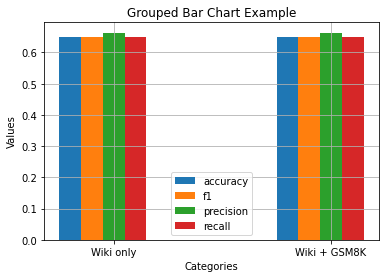

In [77]:
plot_metrics(df, ["Wiki only", "Wiki + GSM8K"])